Note: you may need to restart the kernel to use updated packages.
accuracy:  0.8625
recall: 0.7142857142857143
precision:  0.8695652173913043
Confusion Matrix:
 [[49  3]
 [ 8 20]]



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


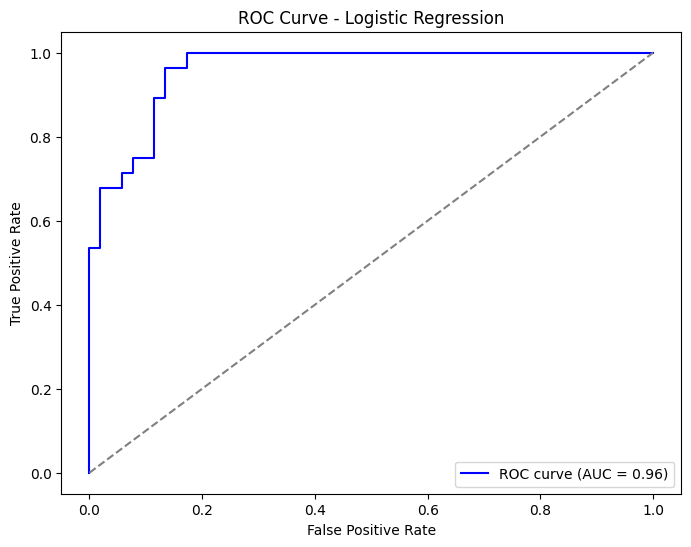

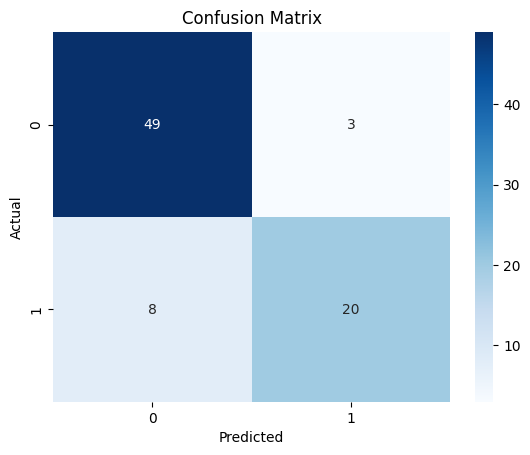

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,roc_curve, auc

df= pd.read_csv("Social_Network_Ads.csv")
df



df.isnull().sum()



df.nunique()


df.dtypes



X = df[['Age','EstimatedSalary']]
Y = df["Purchased"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train,Y_train)



Y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class

accuracy = accuracy_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
precision = precision_score(Y_test,Y_pred)

print("accuracy: ",accuracy)
print("recall:", recall)
print("precision: ",precision)



print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))



fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

